In [1]:
'''
author: Felix Hol
date: 2019 June 11
Align bodypart coordinates, translation to put a specific bodypart at origin, rotation along body axis
'''

# import deeplabcut
import numpy as np
import pandas
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

In [2]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.style.use('seaborn-poster')

In [3]:
dataFile = '181206_01_1783-1816DeepCut_resnet50_moreTest01May6shuffle1_65700.h5'
df = pandas.read_hdf(dataFile)

In [4]:
df.columns = df.columns.droplevel()
df.head()

bodyparts rightForeleg                        rightMiddleLeg              \
coords               x           y likelihood              x           y   
0           328.511835  210.935331   0.999200     203.624449  387.668619   
1           292.164021  189.808358   0.993513     243.016851  364.627638   
2           146.320977  217.890540   0.999835     248.172425  392.868683   
3           146.717561  218.059177   0.999900     249.141231  392.845691   
4           146.722623  225.716007   0.997048     162.363566  458.399230   

bodyparts            rightHindLeg                        leftForeleg  \
coords    likelihood            x           y likelihood           x   
0           0.999876   301.394656  520.014486   0.999522  468.275525   
1           0.999938   301.764870  518.255462   0.999133  355.803457   
2           0.999823   301.395801  540.156510   0.997973  388.307023   
3           0.999848   300.982580  540.569431   0.997042  387.673944   
4           0.845588   306.054909  543.481710   0.982925  202.104039   

bodyparts    ...      proboscis        head                         \
coords       ...     likelihood           x           y likelihood   
0            ...       0.999981  397.319243  228.142239   0.999986   
1            ...       0.999902  369.216005  230.329299   0.999885   
2            ...       0.999996  333.879453  214.862200   0.999942   
3            ...       0.999962  334.702040  218.890778   0.999877   
4            ...       0.713302  253.578441  238.278803   0.999952   

bodyparts     abdomen                             bottom              \
coords              x           y likelihood           x           y   
0          427.600515  315.602938   0.996161  440.929472  384.462806   
1          409.157112  313.665169   0.996496  425.563484  379.037791   
2          366.887173  306.761948   0.998581  384.798753  367.665833   
3          371.604305  306.049872   0.998760  391.030297  369.883193   
4          325.160983  303.908440   0.996186  366.613493  360.617750   

bodyparts             
coords    likelihood  
0           0.999784  
1           0.999805  
2           0.999947  
3           0.999957  
4           0.999351  

[5 rows x 30 columns]

In [5]:
alignTo = 'bottom'
dfRel = df.copy()

for i in dfRel.columns.levels[0]:
    dfRel[i, 'x'] = dfRel[i, 'x'] - df[alignTo, 'x']
    dfRel[i, 'y'] = dfRel[i, 'y'] - df[alignTo, 'y']

In [6]:
dfRel.head()

bodyparts rightForeleg                        rightMiddleLeg             \
coords               x           y likelihood              x          y   
0          -112.417637 -173.527475   0.999200    -237.305023   3.205813   
1          -133.399463 -189.229432   0.993513    -182.546633 -14.410152   
2          -238.477776 -149.775293   0.999835    -136.626329  25.202851   
3          -244.312737 -151.824017   0.999900    -141.889066  22.962497   
4          -219.890870 -134.901743   0.997048    -204.249927  97.781480   

bodyparts            rightHindLeg                        leftForeleg  \
coords    likelihood            x           y likelihood           x   
0           0.999876  -139.534816  135.551680   0.999522   27.346053   
1           0.999938  -123.798614  139.217672   0.999133  -69.760027   
2           0.999823   -83.402953  172.490677   0.997973    3.508270   
3           0.999848   -90.047717  170.686238   0.997042   -3.356354   
4           0.845588   -60.558584  182.863960   0.982925 -164.509454   

bodyparts    ...      proboscis        head                           abdomen  \
coords       ...     likelihood           x           y likelihood          x   
0            ...       0.999981  -43.610229 -156.320567   0.999986 -13.328957   
1            ...       0.999902  -56.347479 -148.708492   0.999885 -16.406372   
2            ...       0.999996  -50.919300 -152.803633   0.999942 -17.911580   
3            ...       0.999962  -56.328258 -150.992415   0.999877 -19.425992   
4            ...       0.713302 -113.035053 -122.338948   0.999952 -41.452511   

bodyparts                       bottom                  
coords             y likelihood      x    y likelihood  
0         -68.859868   0.996161    0.0  0.0   0.999784  
1         -65.372622   0.996496    0.0  0.0   0.999805  
2         -60.903885   0.998581    0.0  0.0   0.999947  
3         -63.833322   0.998760    0.0  0.0   0.999957  
4         -56.709311   0.996186    0.0  0.0   0.999351  

[5 rows x 30 columns]

In [7]:
def getBodyAngle(dfRel, i):
    if dfRel[[('head','x')]].loc[i].values > 0 and dfRel[[('head','y')]].loc[i].values > 0:
        bodyAngleRaw = math.atan(dfRel[[('head','y')]].loc[i].values / dfRel[[('head','x')]].loc[i].values)
        bodyAngle = -1 * bodyAngleRaw
    elif dfRel[[('head','x')]].loc[i].values < 0 and dfRel[[('head','y')]].loc[i].values > 0:
        bodyAngleRaw = math.atan(dfRel[[('head','y')]].loc[i].values / (-1 * dfRel[[('head','x')]].loc[i].values))   
        bodyAngle = -1 * (math.pi - bodyAngleRaw)
    elif dfRel[[('head','x')]].loc[i].values < 0 and dfRel[[('head','y')]].loc[i].values < 0:
        bodyAngleRaw = math.atan((-1 * dfRel[[('head','y')]].loc[i].values) / (-1 * dfRel[[('head','x')]].loc[i].values))   
        bodyAngle = -1 * (math.pi + bodyAngleRaw)
    elif dfRel[[('head','x')]].loc[i].values > 0 and dfRel[[('head','y')]].loc[i].values < 0:
        bodyAngleRaw = math.atan((-1 * dfRel[[('head','y')]].loc[i].values) / (dfRel[[('head','x')]].loc[i].values))   
        bodyAngle = -1* (2 * math.pi - bodyAngleRaw)
    return bodyAngle


In [8]:
dfRelRot = dfRel.copy()
for index, row in dfRelRot.iterrows():
#     print(index)
    bodyAngle = getBodyAngle(dfRel, index)
#     print(bodyAngle)
    for i in dfRelRot.columns.levels[0]:
#         print(i)
#         print(dfRel[i, 'x'][index])
        dfRelRot[i, 'x'][index] = (dfRel[i, 'x'][index] * math.cos(bodyAngle)) - (dfRel[i, 'y'][index] * math.sin(bodyAngle))
        dfRelRot[i, 'y'][index] = (dfRel[i, 'x'][index] * math.sin(bodyAngle)) + (dfRel[i, 'y'][index] * math.cos(bodyAngle))
#         print(bodyAngle)
#         print(dfRel[i, 'x'][index])

In [10]:
dfRelRot.head()

bodyparts rightForeleg                        rightMiddleLeg              \
coords               x           y likelihood              x           y   
0           197.353603  -61.652779   0.999200      60.680297 -229.438124   
1           224.219670  -57.695183   0.993513      78.156768 -165.597238   
2           217.486551 -178.896306   0.999835      19.283162 -137.586689   
3           227.641265 -175.837140   0.999900      28.079454 -140.965697   
4           248.306854  -69.958426   0.997048      66.790440 -216.375340   

bodyparts            rightHindLeg                        leftForeleg  \
coords    likelihood            x           y likelihood           x   
0           0.999876   -93.070374 -170.827774   0.999522  250.535500   
1           0.999938   -86.319936 -165.095504   0.999133  247.722309   
2           0.999823  -137.276696 -133.657004   0.997973  271.857015   
3           0.999848  -128.446763 -144.027124   0.997042  272.109193   
4           0.845588   -93.213975 -168.575576   0.982925  342.287362   

bodyparts    ...      proboscis        head                           \
coords       ...     likelihood           x             y likelihood   
0            ...       0.999981  162.289777 -5.684342e-14   0.999986   
1            ...       0.999902  159.025953  1.136868e-13   0.999885   
2            ...       0.999996  161.064351 -6.394885e-14   0.999942   
3            ...       0.999962  161.157010  1.421085e-14   0.999877   
4            ...       0.713302  166.564526 -1.421085e-14   0.999952   

bodyparts    abdomen                      bottom                  
coords             x         y likelihood      x    y likelihood  
0          69.908855  5.665203   0.996161   -0.0  0.0   0.999784  
1          66.944555  7.821463   0.996496   -0.0  0.0   0.999805  
2          63.442840  2.261386   0.998581   -0.0  0.0   0.999947  
3          66.597039  4.110540   0.998760   -0.0  0.0   0.999957  
4          69.782831  8.038227   0.996186   -0.0  0.0   0.999351  

[5 rows x 30 columns]

<Figure size 921.6x633.6 with 0 Axes>

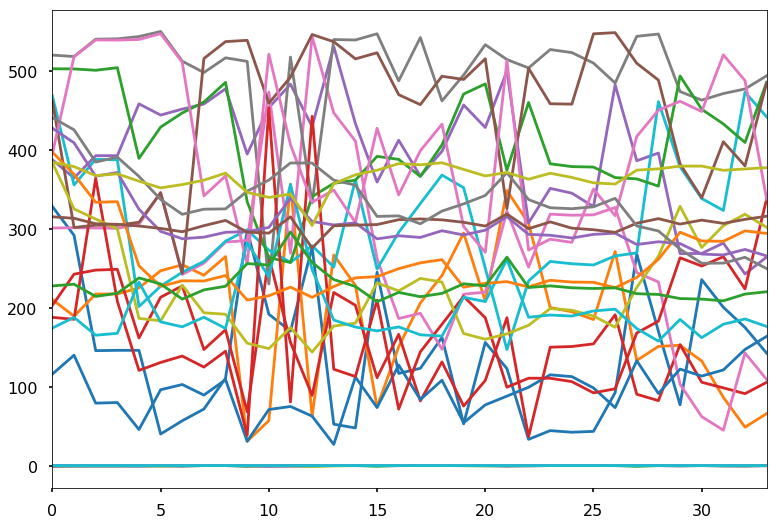

In [11]:
plt.figure()
df.plot(legend=False)

<Figure size 921.6x633.6 with 0 Axes>

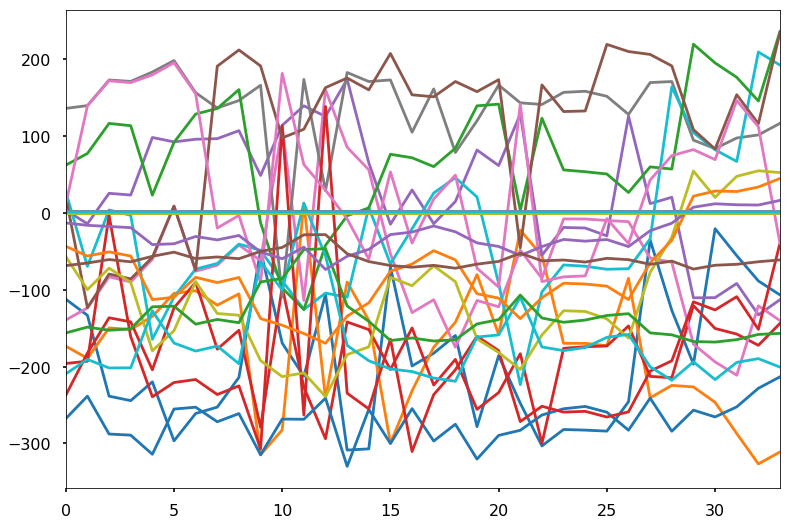

In [12]:
plt.figure()
dfRel.plot(legend=False)

<Figure size 921.6x633.6 with 0 Axes>

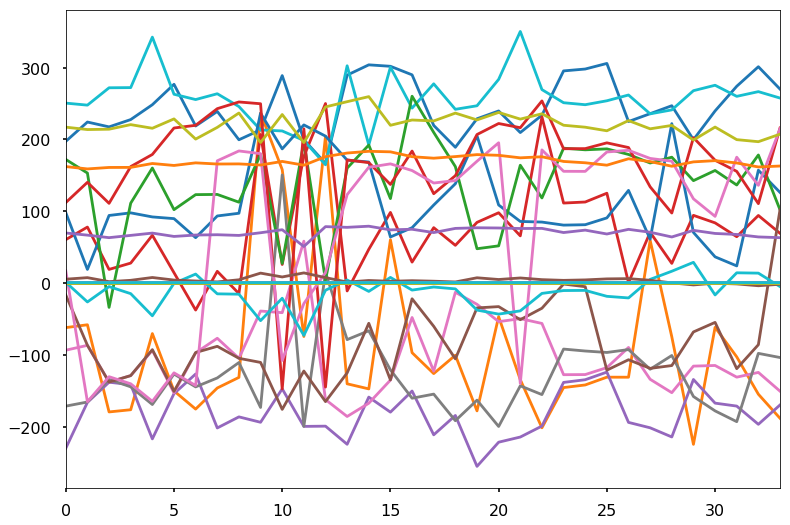

In [13]:
plt.figure()
dfRelRot.plot(legend=False)

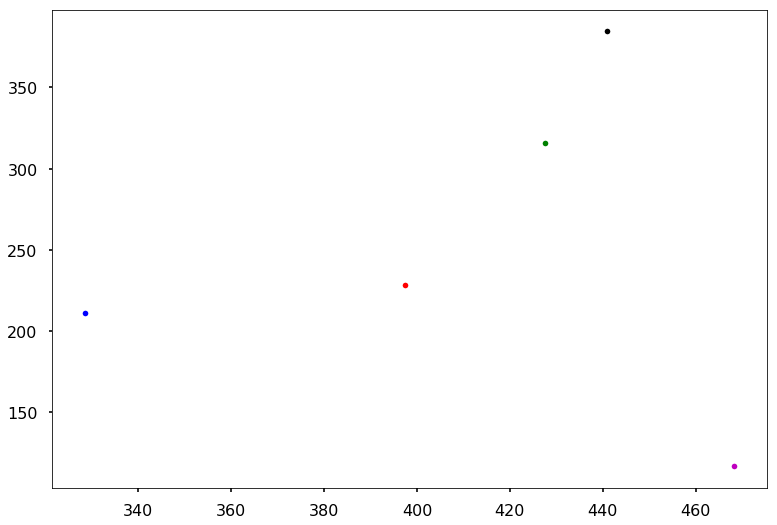

In [14]:
plt.plot(df[[('head','x')]].loc[0], df[[('head','y')]].loc[0],'.r')
plt.plot(df[[('abdomen','x')]].loc[0], df[[('abdomen','y')]].loc[0],'.g')
plt.plot(df[[('bottom','x')]].loc[0], df[[('bottom','y')]].loc[0],'.k')
plt.plot(df[[('rightForeleg','x')]].loc[0], df[[('rightForeleg','y')]].loc[0],'.b')
plt.plot(df[[('leftForeleg','x')]].loc[0], df[[('leftForeleg','y')]].loc[0],'.m')

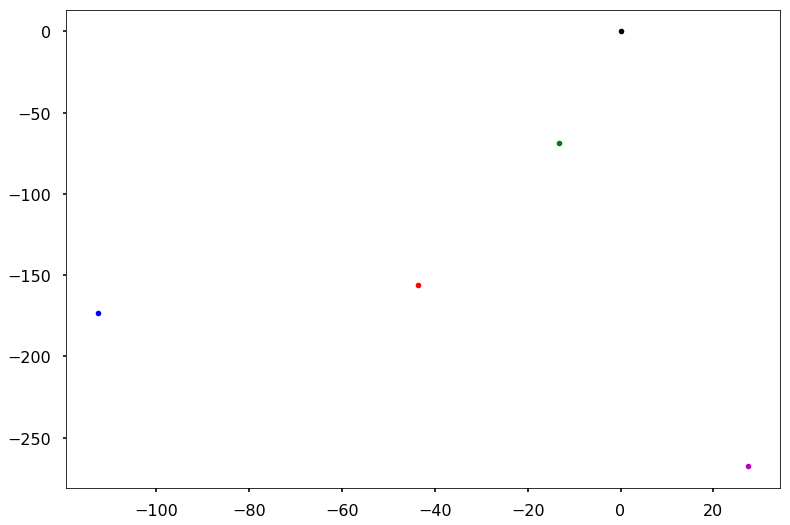

In [15]:
plt.plot(dfRel[[('head','x')]].loc[0], dfRel[[('head','y')]].loc[0],'.r')
plt.plot(dfRel[[('abdomen','x')]].loc[0], dfRel[[('abdomen','y')]].loc[0],'.g')
plt.plot(dfRel[[('bottom','x')]].loc[0], dfRel[[('bottom','y')]].loc[0],'.k')
plt.plot(dfRel[[('rightForeleg','x')]].loc[0], dfRel[[('rightForeleg','y')]].loc[0],'.b')
plt.plot(dfRel[[('leftForeleg','x')]].loc[0], dfRel[[('leftForeleg','y')]].loc[0],'.m')

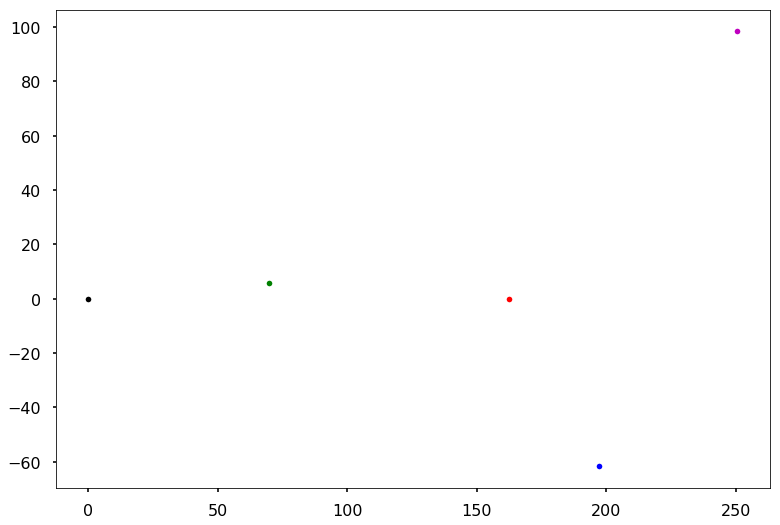

In [16]:
plt.plot(dfRelRot[[('head','x')]].loc[0], dfRelRot[[('head','y')]].loc[0],'.r')
plt.plot(dfRelRot[[('abdomen','x')]].loc[0], dfRelRot[[('abdomen','y')]].loc[0],'.g')
plt.plot(dfRelRot[[('bottom','x')]].loc[0], dfRelRot[[('bottom','y')]].loc[0],'.k')
plt.plot(dfRelRot[[('rightForeleg','x')]].loc[0], dfRelRot[[('rightForeleg','y')]].loc[0],'.b')
plt.plot(dfRelRot[[('leftForeleg','x')]].loc[0], dfRelRot[[('leftForeleg','y')]].loc[0],'.m')

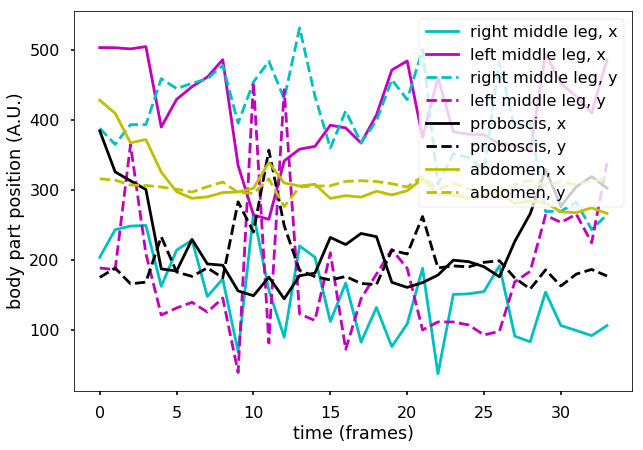

In [17]:
plt.figure(figsize=(10,7))
plt.plot(df[[('rightMiddleLeg','x')]], 'c')
plt.plot(df[[('leftMiddleLeg','x')]], 'm')
plt.plot(df[[('rightMiddleLeg','y')]], '--c')#, alpha=0.25)
plt.plot(df[[('leftMiddleLeg','y')]], '--m')#, alpha=0.25)
plt.plot(df[[('proboscis','x')]], 'k')
plt.plot(df[[('proboscis','y')]], '--k')
# plt.plot(df[[('proboscis','y')]], '--k')#, alpha=0.25)
# plt.plot(df[[('head','x')]], 'w')
# plt.plot(df[[('head','y')]], '--w')
# plt.plot(df[[('bottom','x')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','y')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','x')]], '--k')
# plt.plot(df[[('bottom','y')]], 'k')
plt.plot(df[[('abdomen','x')]], 'y')
plt.plot(df[[('abdomen','y')]], '--y')
# plt.plot(df[[('rightMiddleLeg','y')]], 'w')
# plt.plot(df[[('leftForeleg','x')]], 'm')

# plt.plot(df[[('rightMiddleLeg','y')]], 'w')



plt.xlabel('time (frames)')
plt.ylabel('body part position (A.U.)')
plt.legend(['right middle leg, x', 'left middle leg, x', 'right middle leg, y', 'left middle leg, y', 'proboscis, x', 'proboscis, y', 'abdomen, x', 'abdomen, y'])
# plt.xlim((-2, 45))
# plt.savefig('181206_01_1783-1816_exploring_01.pdf')

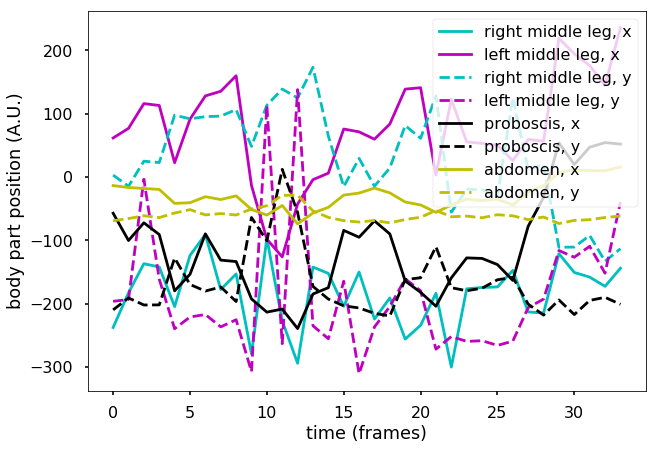

In [18]:
plt.figure(figsize=(10,7))
plt.plot(dfRel[[('rightMiddleLeg','x')]], 'c')
plt.plot(dfRel[[('leftMiddleLeg','x')]], 'm')
plt.plot(dfRel[[('rightMiddleLeg','y')]], '--c')#, alpha=0.25)
plt.plot(dfRel[[('leftMiddleLeg','y')]], '--m')#, alpha=0.25)
plt.plot(dfRel[[('proboscis','x')]], 'k')
plt.plot(dfRel[[('proboscis','y')]], '--k')
# plt.plot(df[[('proboscis','y')]], '--k')#, alpha=0.25)
# plt.plot(df[[('head','x')]], 'w')
# plt.plot(df[[('head','y')]], '--w')
# plt.plot(df[[('bottom','x')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','y')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','x')]], '--k')
# plt.plot(df[[('bottom','y')]], 'k')
plt.plot(dfRel[[('abdomen','x')]], 'y')
plt.plot(dfRel[[('abdomen','y')]], '--y')
# plt.plot(df[[('rightMiddleLeg','y')]], 'w')
# plt.plot(df[[('leftForeleg','x')]], 'm')

# plt.plot(df[[('rightMiddleLeg','y')]], 'w')



plt.xlabel('time (frames)')
plt.ylabel('body part position (A.U.)')
plt.legend(['right middle leg, x', 'left middle leg, x', 'right middle leg, y', 'left middle leg, y', 'proboscis, x', 'proboscis, y', 'abdomen, x', 'abdomen, y'])
# plt.xlim((-2, 45))
# plt.savefig('181206_01_1783-1816_exploring_01.pdf')

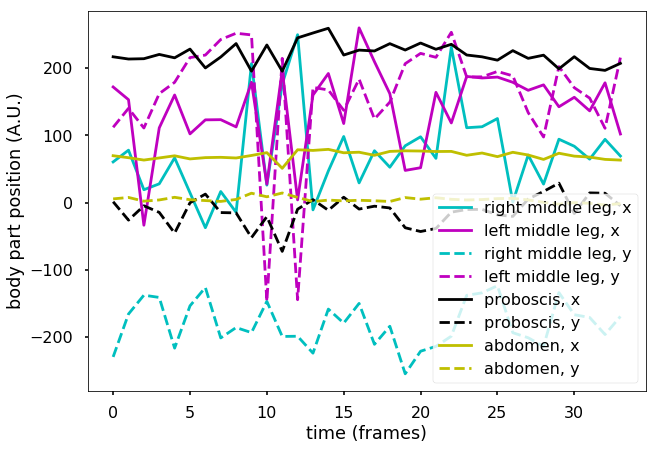

In [19]:
plt.figure(figsize=(10,7))
plt.plot(dfRelRot[[('rightMiddleLeg','x')]], 'c')
plt.plot(dfRelRot[[('leftMiddleLeg','x')]], 'm')
plt.plot(dfRelRot[[('rightMiddleLeg','y')]], '--c')#, alpha=0.25)
plt.plot(dfRelRot[[('leftMiddleLeg','y')]], '--m')#, alpha=0.25)
plt.plot(dfRelRot[[('proboscis','x')]], 'k')
plt.plot(dfRelRot[[('proboscis','y')]], '--k')
# plt.plot(df[[('proboscis','y')]], '--k')#, alpha=0.25)
# plt.plot(df[[('head','x')]], 'w')
# plt.plot(df[[('head','y')]], '--w')
# plt.plot(df[[('bottom','x')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','y')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','x')]], '--k')
# plt.plot(df[[('bottom','y')]], 'k')
plt.plot(dfRelRot[[('abdomen','x')]], 'y')
plt.plot(dfRelRot[[('abdomen','y')]], '--y')
# plt.plot(df[[('rightMiddleLeg','y')]], 'w')
# plt.plot(df[[('leftForeleg','x')]], 'm')

# plt.plot(df[[('rightMiddleLeg','y')]], 'w')



plt.xlabel('time (frames)')
plt.ylabel('body part position (A.U.)')
plt.legend(['right middle leg, x', 'left middle leg, x', 'right middle leg, y', 'left middle leg, y', 'proboscis, x', 'proboscis, y', 'abdomen, x', 'abdomen, y'])
# plt.xlim((-2, 45))
# plt.savefig('181206_01_1783-1816_exploring_01.pdf')

In [ ]:
dfp = pandas.read_pickle('181206_01_2712-2973DeepCut_resnet50_moreTest01May6shuffle1_65700includingmetadata.pickle')

In [ ]:
dfp.head()

In [ ]:
dfp